# DMSL HW5 Code

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
df = pd.read_csv('titanic.csv')
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [3]:
df.shape

(1310, 14)

In [4]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
df = df.drop(columns=['boat', 'body', 'name', 'ticket', 'cabin', 'home.dest', 'embarked'], axis=1)

In [7]:
df.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [8]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500


In [9]:
df.sex.replace({'female': 0, 'male': 1}, inplace = True)

In [10]:
def alone(df):
    if (df.sibsp == 0) & (df.parch == 0):
        return 1
    else:
        return 0
    
df['alone'] =  df.apply(alone, axis=1)
df = df.drop(['sibsp', 'parch'], axis=1)

In [11]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
df.loc[:, 'age'] = imputer.fit_transform(np.array(df.age).reshape(-1, 1))

In [12]:
df = df.dropna()
df.shape

(1308, 6)

In [13]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'fare', 'alone'], dtype='object')

## EDA

In [14]:
for var in df.columns:
    print(df[f'{var}'].value_counts())
    print('\n')

3.0    708
1.0    323
2.0    277
Name: pclass, dtype: int64


0.0    808
1.0    500
Name: survived, dtype: int64


1.0    842
0.0    466
Name: sex, dtype: int64


28.0000    295
24.0000     47
22.0000     43
21.0000     41
30.0000     40
          ... 
66.0000      1
0.6667       1
76.0000      1
67.0000      1
26.5000      1
Name: age, Length: 97, dtype: int64


8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64


1    789
0    519
Name: alone, dtype: int64




In [15]:
df.pclass.value_counts()

3.0    708
1.0    323
2.0    277
Name: pclass, dtype: int64

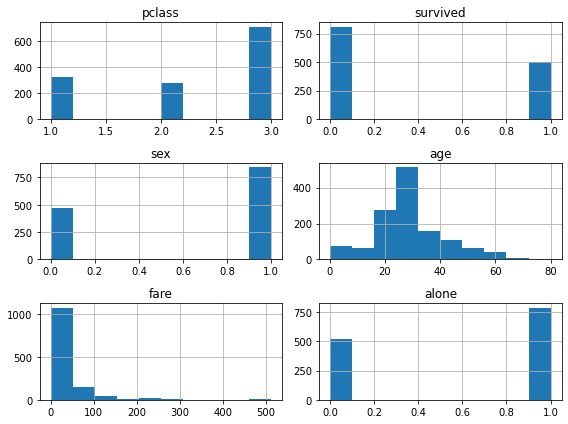

In [16]:
df.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

In [17]:
df.age.describe()

count    1308.000000
mean       29.479485
std        12.881658
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

In [18]:
df.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [19]:
len(df[(df.survived == 0.0) & (df['pclass'] == 3)])/len(df[df.survived == 0.0])

0.6522277227722773

In [20]:
len(df[(df.survived == 0.0) & (df['pclass'] == 3)])/len(df[df['pclass'] == 3])

0.7443502824858758

In [21]:
len(df[(df.survived == 0.0) & (df.alone == 1)])/len(df[df.alone == 1])

0.697084917617237

In [22]:
len(df[(df.survived == 0.0) & (df.sex == 1)])/len(df[df.sex == 1])

0.8087885985748219

In [23]:
len(df[(df.survived == 1.0) & (df.sex == 0)])/len(df[df.sex == 0])

0.7274678111587983

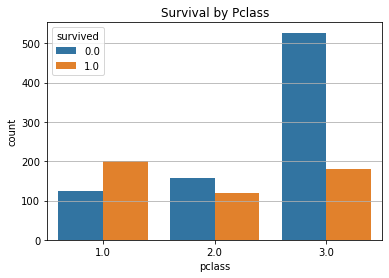

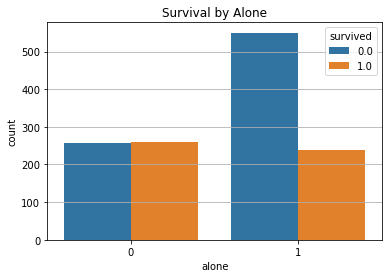

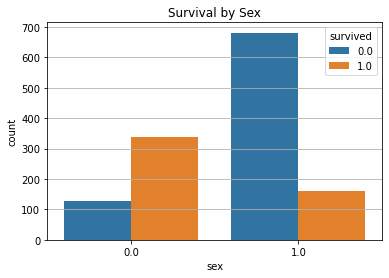

In [24]:
for var in ['pclass', 'alone', 'sex']:
    sns.countplot(data=df, x=var, hue='survived')
    plt.title(f'Survival by {var.title()}')
    plt.grid(axis = 'y')
    plt.show()

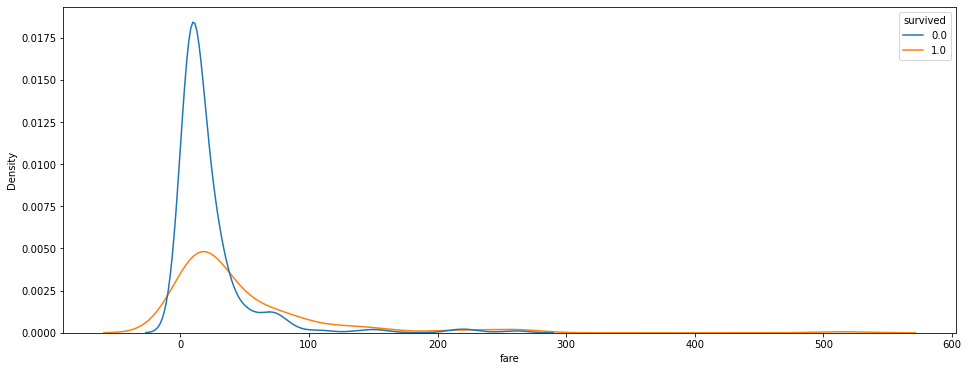

In [25]:
fig = plt.figure(figsize=(16,6))
sns.kdeplot(data=df, x='fare', hue='survived')
plt.show()

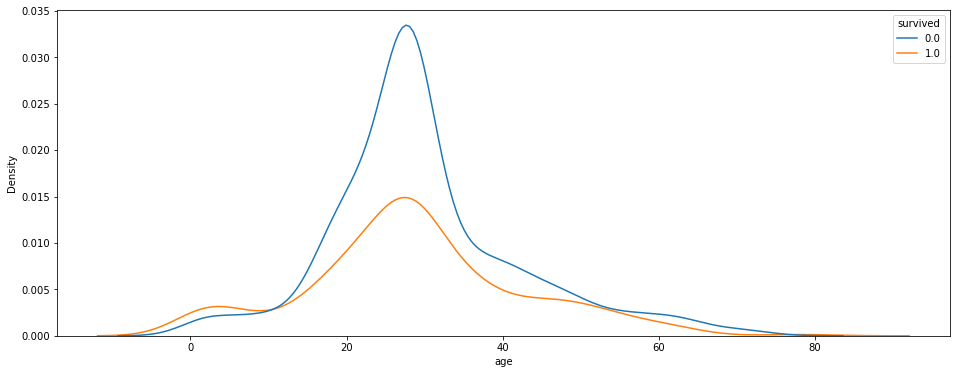

In [26]:
fig = plt.figure(figsize=(16,6))
sns.kdeplot(data=df, x='age', hue='survived')
plt.show()

In [27]:
df.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

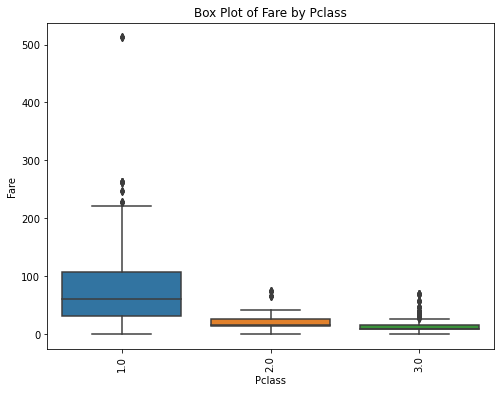

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.xticks(rotation=90)
plt.title(f'Box Plot of Fare by Pclass')
plt.show()

In [29]:
from scipy.stats import f_oneway
 
grouped=df.groupby('pclass')['fare'].apply(list)
anova_res = f_oneway(*grouped)
print('P-Value: ', anova_res[1])

P-Value:  8.904613790086322e-129


## Feature Selection

In [31]:
df = pd.get_dummies(df, columns=['pclass'], drop_first=True)

In [32]:
df.columns

Index(['survived', 'sex', 'age', 'fare', 'alone', 'pclass_2.0', 'pclass_3.0'], dtype='object')

In [33]:
X = df[['sex', 'age', 'fare', 'alone', 'pclass_2.0', 'pclass_3.0']]
y = df.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
k_best = SelectKBest(score_func=chi2, k='all')
X_train_selected = k_best.fit_transform(X_train, y_train)
feature_scores = k_best.scores_
p_vals = k_best.pvalues_
feature_names =X.columns
feature_ranking = list(zip(feature_names, feature_scores, p_vals))
feature_ranking.sort(key=lambda x: x[1], reverse=True)

for i, (feature_name, score, p_val) in enumerate(feature_ranking):
    print(f"Rank {i + 1}: {feature_name} (Score: {score:.2f}, P-Value: {p_val})")

Rank 1: fare (Score: 4783.99, P-Value: 0.0)
Rank 2: sex (Score: 109.44, P-Value: 1.3020781884554591e-25)
Rank 3: pclass_3.0 (Score: 28.48, P-Value: 9.471695711192964e-08)
Rank 4: alone (Score: 17.54, P-Value: 2.805977653675356e-05)
Rank 5: age (Score: 11.28, P-Value: 0.0007826916133751593)
Rank 6: pclass_2.0 (Score: 0.78, P-Value: 0.3769649874276526)


In [35]:
X = df[['sex', 'pclass_3.0', 'alone', 'age']]
y = df.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling
**Logistic Regression**

In [30]:
def confusion(df, y_test, y_pred):
    # Confusion Matrix
    cats = list(df.survived.unique())
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=cats, 
                yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       156
         1.0       0.72      0.63      0.67       106

    accuracy                           0.75       262
   macro avg       0.74      0.73      0.74       262
weighted avg       0.75      0.75      0.75       262



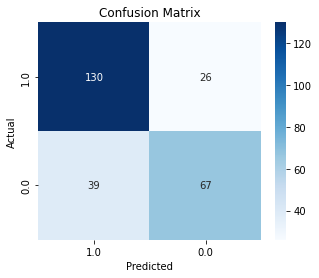

In [36]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

log_classifier = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=log_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_lr_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

In [37]:
print("Coefficients:", best_lr_model.coef_)
# 'sex', 'pclass_3.0', 'alone', 'age'

Coefficients: [[-1.98359043 -0.96216589 -0.2079606  -0.01458636]]


**K-Nearest Neighbors**

Best Parameters:
{'n_neighbors': 5}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       156
         1.0       0.70      0.55      0.61       106

    accuracy                           0.72       262
   macro avg       0.72      0.69      0.70       262
weighted avg       0.72      0.72      0.71       262



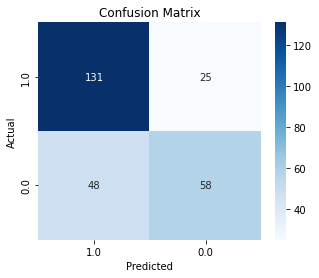

In [38]:
param_grid = {
    'n_neighbors': [2, 5, 10, 15]
}

knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_knn_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Support Vector Machine**

Best Parameters:
{'C': 10, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       156
         1.0       0.72      0.67      0.69       106

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



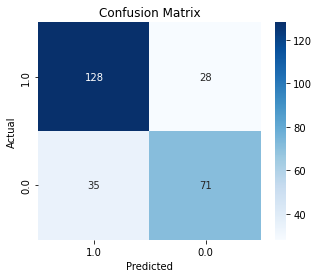

In [39]:
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'], 
}

svm_classifier = svm.SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Decision Tree**

Best Parameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       156
         1.0       0.78      0.59      0.67       106

    accuracy                           0.77       262
   macro avg       0.77      0.74      0.75       262
weighted avg       0.77      0.77      0.76       262



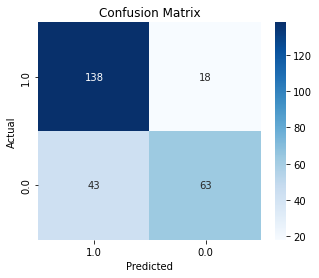

In [40]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'criterion': ['gini', 'entropy']  
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_dt_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Random Forest**

Best Parameters:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       156
         1.0       0.80      0.63      0.71       106

    accuracy                           0.79       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.79      0.79      0.78       262



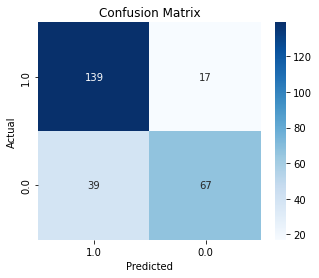

In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Gradient Boosting**

Best Parameters:
{'learning_rate': 0.01, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       156
         1.0       0.80      0.61      0.70       106

    accuracy                           0.78       262
   macro avg       0.79      0.76      0.76       262
weighted avg       0.79      0.78      0.78       262



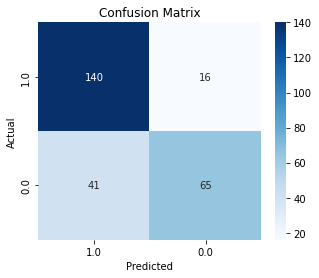

In [46]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

gboost_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters:')
print(best_params)

best_gboost_model = grid_search.best_estimator_
y_pred = best_gboost_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)